# Chapter 6 - Standard Deviation and Normal Model

## The Standard Deviation as a Ruler

* use standard deviation to compare different-looking values
* standard deviation tells us how the whole collection varies
* we can look at an individual value's distance from the mean in units of standard deviations

## Standardizing with z-Scores

* expressing each value of a dataset in standard deviations **standardizes** the values
* these **standardized values** are commonly denoted with the letter $z$
* usually just called **z-scores**

$z = \frac{y - \hat{y}}{s}$

* have no units
* measure distance of each value from the mean in units of standard deviations
* values below the mean have negative z-scores
* allows comparing values that are measured on different variables, with different scales, units, or for different individuals

### Standardizing Mechanics

* shift: subtracting the mean
* rescale: dividing by the standard deviation

## Shifting Data

* when we **shift** data by adding or subtracting a constant to each value, all measures of position (center, percentiles, min,, max) will increase (or decrease) by the same constant
* measures of spread remain unchanged

## Rescaling Data

* multiplying or dividing each value by a constant changes the measurement units, i.e. **rescales** the data
* rescaling the values results in all measures of position (mean, median, and percentiles) and measures of spread (range, IQR, and standard deviation) to be multiplied or divided by the same constant

## Back to z-Scores

* standardizing into z-scores does not change the **shape** of the distribution of a variable
* standardizing into z-scores changes the **center** by making the mean 0
* standardizing into z-scores changes the **spread** by making the standard deviation 1

### Step-by-Step Example : Working with Standardized Variables

* plan: state what you want to find out
* variables: identify the variables and report the W's 
* check the appropriate condition
  - quantitative data condition
* mechanics: standardize the variable
* conclusion: interpret your results in context

## When is a z-Score Big?

* z-score of +/- 3 or more is rare
* larger values call out for attention

### Models

* models don't match real world exactly, yet they still can be useful
* without models, what we can learn about the world is limited to only what we can say about our specific dataset

### Normal Models

* "bell-shaped curves"
* **Normal models** are appropriate for distributions whose shapes are _unimodal_, and _roughly symmetric_
* for these distributions, they provide a measure of how extreme a z-score is
* there is a Normal model for every possible combination of mean and standard deviation
* $N(\mu, \sigma)$: represents a Normal model with mean $\mu$ and standard deviation $\sigma$

### Parameters and Statistics

* $\mu$ and $\sigma$ are not numerical summaries of data, but **parameters** -- numbers chosen to help _specify the model_.  
* in contrast, summaries like $\bar{y}$ and $s$, are called **statistics**
* parameters are typically represented using Greek letters, while statistics are written with Latin letters

### Standard Normal Model

* if we model the data with a Normal model, and standardize the values using the corresponding $\mu$ and $\sigma$, we call the standardized values z-scores as before:

$z = \frac{y - \mu}{\sigma}$

* a Normal model using $\mu$ = 0 and $\sigma$ = 1 is called a **standard Normal model** (or standard Normal distribution), and is represented as $N(0, 1)$

### Cautions

* when we use the Normal model, we assume that the distribution of the data is Normal
* it's sufficient to check the following condition:  the shape of the data's distribution is unimodal and symmetric
* check this by making a histogram or a Normal probability plot
* all models make **assuptions** - be sure to call out those assumptions as part of the analysis and check the associated **conditions** in the data

## The 68-95-99.7 Rule

In a Normal model:

* 68% of the values fall within 1 standard deviation of the mean
* 95% of the values fall within 2 standard deviation of the mean
* 99.7% of the values fall within 3 standard deviation of the mean

* Also called the "Empirical Rule"

## Working with Normal Models

* sketch a picture to help think about a Normal model
* make a histogram to check the 'nearly Normal condition'

### How to Sketch a Normal Curve

* start at the middle, sketch a bell-shaped curve, symmetric about the mean
* limit the range of the x-axis from -3 to +3 standard deviations
* the inflection points (where the curvature changes from donwnwards to upwards) are at +/- 1 standard deviation)

## Step-by-Step Example

* plan: state what you want to know
* variables: identify the variable and report the W's
* be sure to check the appropriate conditions (nearly normal condition)
* specify the parameters of your model ($N(\mu, \sigma)$)
* mechanics: make a picture of this Normal model (sketch)
* locate your score
* conclusion: interpret your result in context

## Tchebycheff's Inequality

In *any* distribution, at least

$1 - \frac{1}{k^2}$

of the values must lie within $\pm{k}$ standard deviations of the mean.

* for $k=1$, $0$ : if the distribution is far from Normal, it's possible that _none_ of the values are within 1 standard deviation of the mean.
* for $k=2$, $3/4$ : for any distribution, at least 75% of the values are within 2 standard deviations of the mean
* for $k=3$, $8/9$ : at least 89% of values lie within 3 standard deviations of the mean

## Finding Normal Percentiles

* first find the z-score for the given value
* then "look up" the z-score to convert to a percentile

### Calculate using SciPy

In [153]:
# %load ./snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [154]:
# generate boundaries, and infer low/high values if not provided
def infer_boundaries(low=None, high=None, mean=0, stddev=1):
    # generate the boundaries
    lowerBound = mean - 3 * stddev
    upperBound = mean + 3 * stddev
    
    # substitute for values not provided
    if(low is None):
        low = lowerBound
    if(high is None):
        high = upperBound        

    return (lowerBound, low, high, upperBound)

In [176]:
# display the % of area under normal curve between two values
def print_percent_coverage(low=None, high=None, mean=0, stddev=1):
    lowerBound, low, high, upperBound = infer_boundaries(low, high, mean, stddev)
    
    # print the % coverage
    pctiles = stats.norm.cdf([low, high], loc=mean, scale=stddev)
    area = (pctiles[1] - pctiles[0]) * 100
    print("The region between z-scores %.2f and %.2f covers %.2f%% of the area under the curve." % (low, high, area))    

In [177]:
# plot a normal curve and a filled area between 
# two values under the curve N(mean, stddev)
def plot_normal_curve(low=None, high=None, mean=0, stddev=1):
    lowerBound, low, high, upperBound = infer_boundaries(low, high, mean, stddev)
    
    # plot the curve
    x = np.linspace(lowerBound, upperBound, 1000)
    y = stats.norm.pdf(x, loc=mean, scale=stddev)
    curve = DataFrame({"x": x, "y": y})
    plt.plot(curve.x, curve.y)
    
    # plot the fill
    fill = curve[(curve.x >= low) & (curve.x <= high)]
    plt.fill_between(fill.x, fill.y, facecolor='darkorange', alpha=0.75)

    print_percent_coverage(low, high, mean, stddev)

The region between z-scores -1.00 and 1.50 covers 77.45% of the area under the curve.


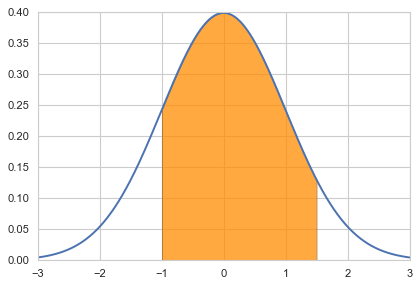

In [178]:
plot_normal_curve(low=-1, high=1.5)

The region between z-scores -3.00 and 1.80 covers 96.27% of the area under the curve.


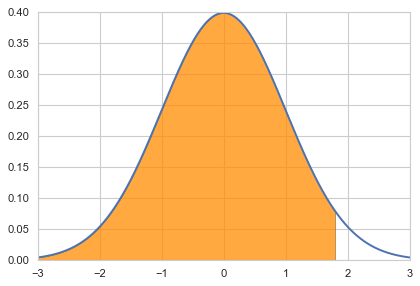

In [179]:
plot_normal_curve(high=1.8)

The region between z-scores -1.00 and 3.00 covers 84.00% of the area under the curve.


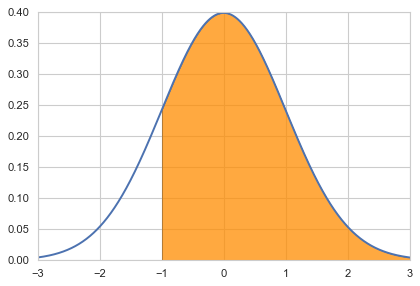

In [180]:
plot_normal_curve(low=-1)

### Step-by-Step Example

* plan: state the problem
* variables: name the variable
* check the appropriate conditions and specify which Normal model to use
* mechanics: make a picture of this Normal model; locate the desired values and shade the region of interest
* find z-scores for the cut points; use tech. to find the desired proportions; represent as area under the curve
* conclusion: interpret your results

## From Percentiles to Scores: z in Reverse

In [85]:
z = stats.norm.ppf([0.9])[0]
z * 100 + 500

628.15515655446006

In [86]:
# percentiles => z-score : stats.norm.ppf
# z-score => percentiles : stats.norm.cdf
# z-score => height of normal curve at that score : stats.norm.pdf

### Step-by-Step Example - How high does a value need to be to put it in the top n%?

* plan: state the problem
* variable: define the variable
* check conditions
* specify the Normal model to use: $N(\mu, \sigma)$
* mechanics: make a picture; locate desired percentile by shading the rightmost % of the area
* find the corresponding z-score
* convert z-score back to original units
* conclusion: interpret your results

### Step-by-Step Example - What % of cases will fall below a certain value?

* plan: state the problem
* variable: name the variable
* check conditions
* specify the Normal model to use: $N(\mu, \sigma)$
* mechanics: make a picture; locate value of interest and shade appropriate region
* convert cutoff value to z-score
* find area associated with that z-score
* conclusion: interpret your results; check that it's consistent

### Step-by-Step Example - What mean will lead to n% of values below a given cutoff?

* plan: state the problem
* variable: name the variable
* check conditions
* specify Normal model to use: $N(\mu,\sigma)$; NOTE: mean is not given in this case
* mechanics: make a picture; center at $\mu$ and shade below cutoff
* find z-score that cuts of lowest n%
* solve for $\mu$
    * $\mu = z * \sigma + cutoff value$
* conclusion: interpret your results    

### Step-by-Step Example - What standard deviation would lead to n% of values below a given cutoff?

* plan: state the problem
* variable: name the variable
* check conditions
* specify Normal model to use: $N(\mu,\sigma)$; NOTE: standard deviation is not given in this case
* mechanics: make a picture; center at $\mu$ and shade below cutoff
* find z-score that cuts of lowest n%
* solve for $\sigma$
    * $\sigma = \frac{(\mu - cutoff value)}{z} $
* conclusion: interpret your results    

## Normal Probability Plot

* must check that the distribution is roughly unimodal and symmetric in order to use the Normal model
* drawing a histogram and reviewing the shape is one way to do this
* the **Normal probability plot** is a specialized graphical display that can be used to evaluate this as well
    * if the distribution of the data is roughly normal, the plot is roughly a diagonal straight line
    * deviations from a straight line indicate that the distribution is not Normal
    * the plot is usually able to show deviations from Normal more clearly than a histogram
    * a histogram is usually better able to show _how_ a distribution deviates from a Normal distribution

## How Does a Normal Probability Plot Work?

* it takes each data value and plots it against the z-score you'd expect that point to have if the distribution were perfectly Normal
* when the values match up well, the line is straight
* when they don't, the plot shows curves

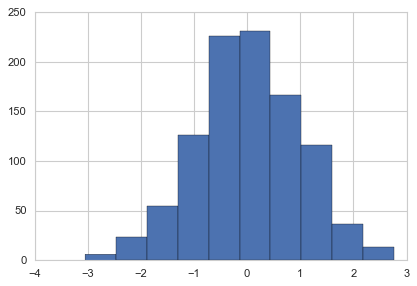

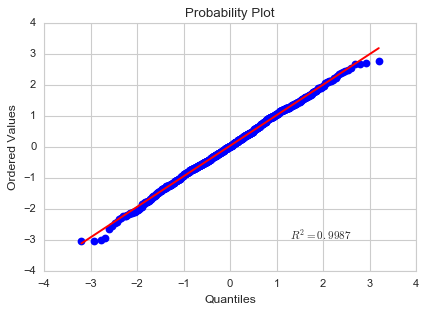

In [190]:
x = stats.norm.rvs(loc=0, scale=1, size=1000)
plt.hist(x)
plt.show()

stats.probplot(x, plot=plt);

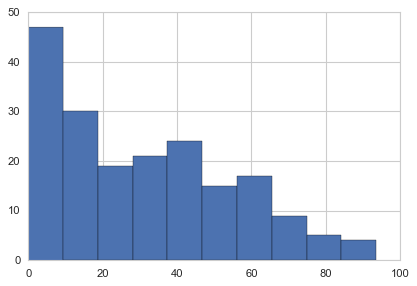

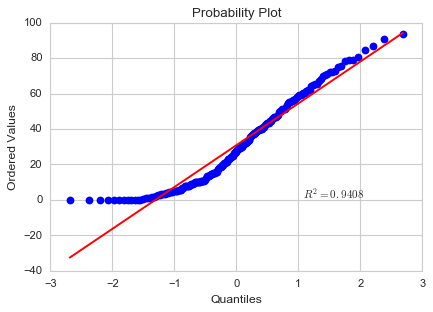

In [191]:
df = pd.read_table('./data/Receivers_2010.txt')
plt.hist(df.YdsG.values)
plt.show()

stats.probplot(df.YdsG.values, plot=plt);

## What Can Go Wrong?

* Don't use a Normal model when the distribution is not unimodal and symmetric.
* Don't use the mean and standard deviation when outliers are present.
* Don't round your results in the middle of a calculation.
* Don't worry about minor differences in results.

## What Have We Learned?

* Standardizing
* Standardized value
* Shifting
* Rescaling
* Normal model
* Parameter
* Statistic
* z-score
* Standard Normal model
* Nearly Normal Condition
* 68-95-99.7 Rule
* Normal percentile
* Normal probability plot

### Skills

[pg. 133]